In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# load the data file 
df_train=pd.read_csv('/content/gdrive/MyDrive/ML and deep learning projects /Breast Cancer Wisconsin uci repo/wpbc.csv',header=None)

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [ ]:
df_train.drop(0,1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train[1] = le.fit_transform(df_train[1].values)

In [ ]:
df_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


# Exploratory data analysis

### Drop Null Values

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       198 non-null    int64  
 1   2       198 non-null    int64  
 2   3       198 non-null    float64
 3   4       198 non-null    float64
 4   5       198 non-null    float64
 5   6       198 non-null    float64
 6   7       198 non-null    float64
 7   8       198 non-null    float64
 8   9       198 non-null    float64
 9   10      198 non-null    float64
 10  11      198 non-null    float64
 11  12      198 non-null    float64
 12  13      198 non-null    float64
 13  14      198 non-null    float64
 14  15      198 non-null    float64
 15  16      198 non-null    float64
 16  17      198 non-null    float64
 17  18      198 non-null    float64
 18  19      198 non-null    float64
 19  20      198 non-null    float64
 20  21      198 non-null    float64
 21  22      198 non-null    float64
 22  23

In [ ]:
df_train[34]=df_train[34].replace({'?':np.nan})
df_train.shape

(198, 34)

In [ ]:
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_train.shape

(194, 34)

### Class Samples Distribution

In [ ]:
values=df_train[1].value_counts()
class_size=values.tolist()
class_size

[148, 46]

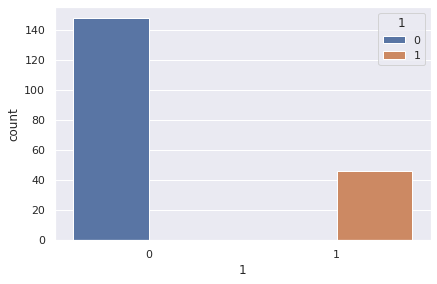

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=df_train[1], hue=df_train[1], data=df_train)

### Normal Distribution

In [ ]:
X=df_train.iloc[:, 1:] 
Y= df_train[1]
X

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,3,14.72,25.26,99.28,657.5,0.11740,0.21120,0.17290,0.09465,0.2079,0.07496,0.3405,1.1580,2.188,26.12,0.004957,0.04553,0.05166,0.015970,0.02539,0.005548,16.67,31.97,111.60,814.8,0.14640,0.5352,0.5655,0.19740,0.3778,0.11320,1.7,21
190,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,0.05262,1.3740,2.3120,9.938,192.40,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,24.67,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
191,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,0.06105,0.3235,1.8390,1.971,32.61,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,17.34,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
192,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,0.05392,0.6101,1.4250,3.827,63.02,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,20.76,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0


# ML Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
Y_Pred_svm = classifier.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class N', 'class R']
print(classification_report(y_test, Y_Pred_svm , target_names=target_names))

              precision    recall  f1-score   support

     class N       0.83      0.96      0.89        47
     class R       0.82      0.50      0.62        18

    accuracy                           0.83        65
   macro avg       0.83      0.73      0.76        65
weighted avg       0.83      0.83      0.82        65



## Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(X_train, y_train)
Y_Pred_boost = clf.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_Pred_boost , target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.91      0.86        47
     class 1       0.67      0.44      0.53        18

    accuracy                           0.78        65
   macro avg       0.74      0.68      0.70        65
weighted avg       0.77      0.78      0.77        65



## k Neighbors classifier & Validation Curve 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predic_knn=neigh.predict(X_test)
acc_test = accuracy_score(y_test, predic_knn)
print('Test set accuracy of bc: {:.8f}'.format(acc_test)) 

Test set accuracy of bc: 0.70769231


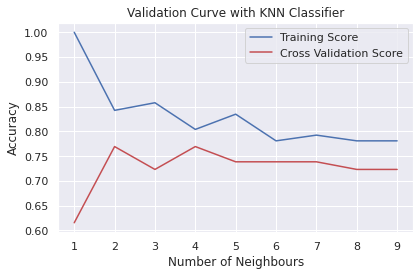

In [ ]:
# Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
parameter_range = np.arange(1, 10, 1)
train_score, test_score = validation_curve(KNeighborsClassifier(), X_test, y_test,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'r')

plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

## LR & GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

log_class=LogisticRegression()
#c is also one parameter in lR
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}# l1 and l2 is reglulization parameter
cv=KFold(n_splits=10,random_state=42, shuffle=True)

clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[45  2]
 [10  8]]
0.8153846153846154
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        47
           1       0.80      0.44      0.57        18

    accuracy                           0.82        65
   macro avg       0.81      0.70      0.73        65
weighted avg       0.81      0.82      0.80        65



# Handling Class imbalance 

### Random Over Sampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
os=RandomOverSampler(0.80)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 101, 1: 28})
The number of classes after fit Counter({0: 101, 1: 80})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

log_class=LogisticRegression()
#c is also one parameter in lR
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}# l1 and l2 is reglulization parameter
cv=KFold(n_splits=10,random_state=42, shuffle=True)

clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_ns,y_train_ns)

y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[38  9]
 [ 6 12]]
0.7692307692307693
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        47
           1       0.57      0.67      0.62        18

    accuracy                           0.77        65
   macro avg       0.72      0.74      0.73        65
weighted avg       0.78      0.77      0.77        65



## SMOTE Oversampling 

In [ ]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.60)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 101, 1: 28})
The number of classes after fit Counter({0: 89, 1: 48})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

log_class=LogisticRegression()
#c is also one parameter in lR
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}# l1 and l2 is reglulization parameter
cv=KFold(n_splits=10,random_state=42, shuffle=True)

clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_ns,y_train_ns)

y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[40  7]
 [ 7 11]]
0.7846153846153846
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.61      0.61      0.61        18

    accuracy                           0.78        65
   macro avg       0.73      0.73      0.73        65
weighted avg       0.78      0.78      0.78        65

